In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfw = pd.read_csv('./assets/input/weather.csv')
dft = pd.read_csv('./assets/input/train.csv')
dfs = pd.read_csv('./assets/input/spray.csv')
dfw.shape, dft.shape, dfs.shape

((2944, 22), (10506, 12), (14835, 4))

In [3]:
dfw['Date'] = pd.to_datetime(dfw['Date'])
dft['Date'] = pd.to_datetime(dft['Date'])

In [4]:
dfw = dfw[dfw['Tavg'] != 'M']

In [5]:
dfw['Tavg'] = dfw['Tavg'].astype('int')

In [53]:
temp_dict = {}
for i in range(5, 11):
    temp_dict[i] = pd.Series((dfw.groupby(dfw['Date'].dt.month).get_group(i))['Tavg']).mean()
avg_temp = pd.DataFrame(list(temp_dict.items()), index=temp_dict.keys())

In [54]:
mos_dict = {}
for i in range(5, 11):
    mos_dict[i] = pd.Series((dft.groupby(dft['Date'].dt.month).get_group(i))['NumMosquitos']).mean()
avg_num_mos = pd.DataFrame(list(mos_dict.items()), index=mos_dict.keys())

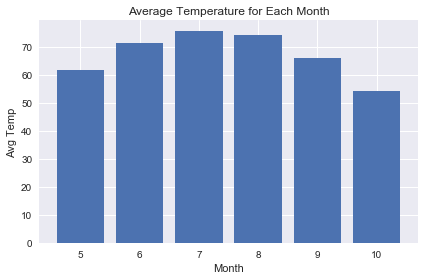

In [75]:
fig = plt.figure()
ax1 = plt.bar(avg_temp[0], avg_temp[1])
plt.xlabel('Month')
plt.ylabel('Avg Temp')
plt.title('Average Temperature for Each Month')
plt.tight_layout();

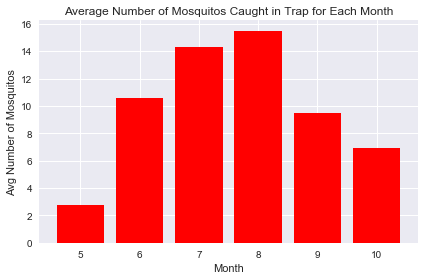

In [76]:
fig = plt.figure()
ax1 = plt.bar(avg_num_mos[0], avg_num_mos[1], color='red')
plt.xlabel('Month')
plt.ylabel('Avg Number of Mosquitos')
plt.title('Average Number of Mosquitos Caught in Trap for Each Month')
plt.tight_layout();